In [ ]:
# ---------------------------------------------
# IMPORTS AND SETUP
# ---------------------------------------------

# -----------------------------
# Data Handling Libraries
# -----------------------------
import os         # For interacting with the operating system (e.g., file paths)
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations

# -----------------------------
# Financial Indicators
# -----------------------------
import talib      # For calculating technical analysis indicators

# -----------------------------
# Visualization Libraries
# -----------------------------
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns            # For enhanced plot aesthetics
sns.set(style='whitegrid')       # Apply a clean seaborn style

# -----------------------------
# File Path Setup
# -----------------------------

# Path to the folder containing CSV files
data_path = r"../data/yfinance_data/"

# List all CSV files in the folder
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

# Display the CSV files found
print("CSV files found:", csv_files)


CSV files found: ['AAPL.csv', 'AMZN.csv', 'GOOG.csv', 'META.csv', 'MSFT.csv', 'NVDA.csv']


In [ ]:
# ---------------------------------------------
# Load and Prepare Stock Data from CSV
# ---------------------------------------------

# Select the first CSV file in the folder to test
file_path = os.path.join(data_path, csv_files[0])

# Load the CSV into a DataFrame
# - Use the first column as the index
# - Parse dates automatically
df_stock = pd.read_csv(file_path, index_col=0, parse_dates=True)

# Flatten MultiIndex columns if they exist (common in some financial CSVs)
if isinstance(df_stock.columns, pd.MultiIndex):
    df_stock.columns = [col[0] for col in df_stock.columns]

# Keep only the main columns needed for analysis
required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df_stock = df_stock[[c for c in required_cols if c in df_stock.columns]]

# Preview the first few rows of the DataFrame
df_stock.head()


,Open,High,Low,Close,Volume
Date,,,,,
2009-01-02,2.575630,2.730385,2.554037,2.721686,746015200
2009-01-05,2.794266,2.884539,2.780469,2.836553,1181608400
2009-01-06,2.877641,2.914229,2.770872,2.789767,1289310400
2009-01-07,2.753477,2.774170,2.706990,2.729484,753048800
2009-01-08,2.712090,2.793666,2.700393,2.780169,673500800


In [ ]:
# ---------------------------------------------
# TECHNICAL INDICATORS
# ---------------------------------------------

# Convert Close prices to a numpy array for use with TA-Lib
close_prices = df_stock['Close'].values

# -----------------------------
# 1. Moving Averages
# -----------------------------
# Calculate 20-day and 50-day simple moving averages
df_stock['MA_20'] = talib.SMA(close_prices, timeperiod=20)
df_stock['MA_50'] = talib.SMA(close_prices, timeperiod=50)

# -----------------------------
# 2. Relative Strength Index (RSI)
# -----------------------------
# Calculate 14-day RSI to measure momentum
df_stock['RSI_14'] = talib.RSI(close_prices, timeperiod=14)

# -----------------------------
# 3. MACD (Moving Average Convergence Divergence)
# -----------------------------
# Calculate MACD line, signal line, and histogram
df_stock['MACD'], df_stock['MACD_signal'], df_stock['MACD_hist'] = talib.MACD(
    close_prices, fastperiod=12, slowperiod=26, signalperiod=9
)

# Preview the last 10 rows to check the calculated indicators
df_stock.tail(10)


,Open,High,Low,Close,Volume,MA_20,MA_50,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,
2023-12-15,195.681984,196.543840,195.156944,195.721619,128538400,190.723320,181.953393,67.991716,3.745908,3.574956,0.170952
2023-12-18,194.255468,194.790425,192.571376,194.057343,55751900,191.030421,182.322577,62.680148,3.582111,3.576387,0.005724
2023-12-19,194.324802,195.107405,194.057324,195.097504,40714100,191.302353,182.682884,64.544428,3.495934,3.560297,-0.064363
2023-12-20,195.057874,195.830575,193.007248,193.007248,52242800,191.509893,183.013258,58.247457,3.221832,3.492604,-0.270771
2023-12-21,194.265371,195.236198,191.689689,192.858643,46482500,191.676816,183.312761,57.815603,2.958510,3.385785,-0.427275
2023-12-22,193.353962,193.581821,191.164647,191.788757,37149600,191.856618,183.572859,54.672784,2.633141,3.235256,-0.602115
2023-12-26,191.798670,192.076049,191.025969,191.243912,28919300,192.018094,183.858864,53.090049,2.304751,3.049155,-0.744404
2023-12-27,190.689158,191.689703,189.302247,191.342972,48087700,192.154308,184.149424,53.354446,2.029104,2.845145,-0.816041
2023-12-28,192.323710,192.838849,191.362784,191.768951,34049900,192.362839,184.479567,54.540999,1.823998,2.640915,-0.816918


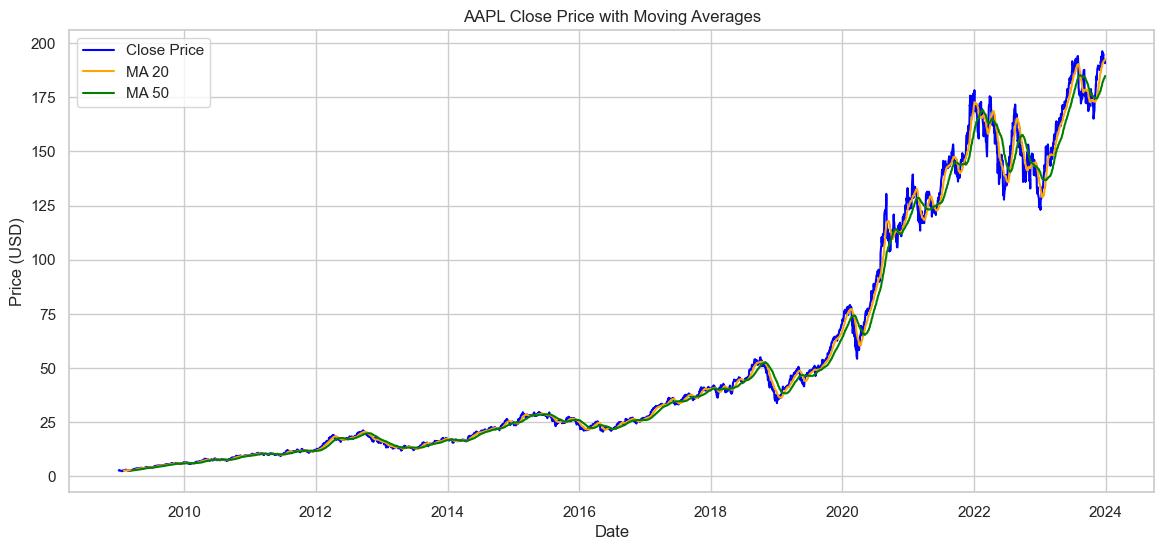

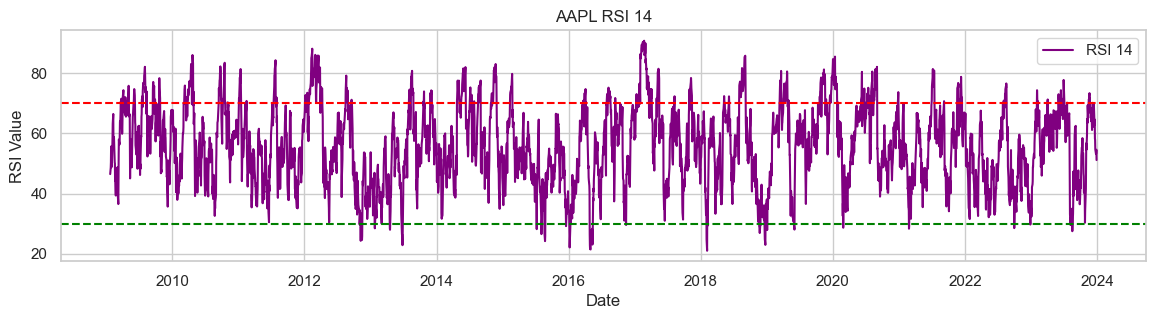

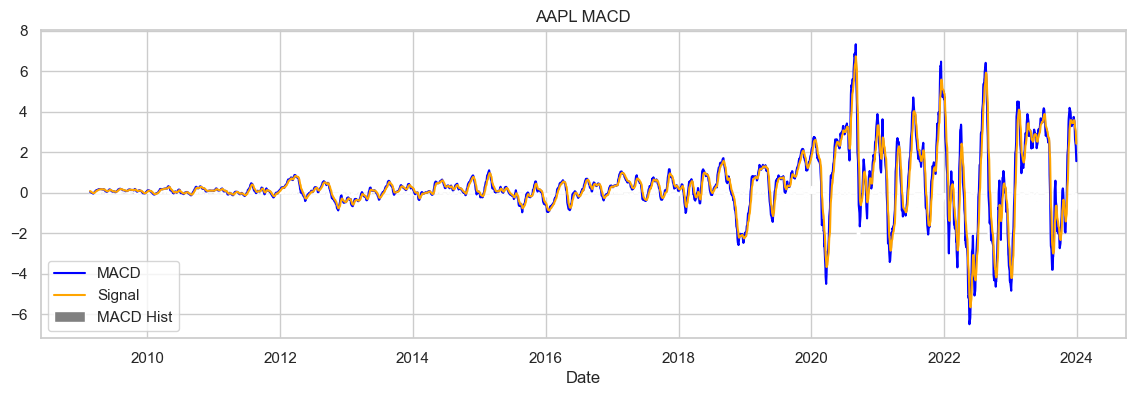

In [ ]:
# ---------------------------------------------
# Visualize Stock Prices and Technical Indicators
# ---------------------------------------------

sns.set(style='whitegrid')  # Apply a clean seaborn style

# -----------------------------
# 1. Close Price with Moving Averages
# -----------------------------
plt.figure(figsize=(14, 6))
plt.plot(df_stock['Close'], label='Close Price', color='blue')
plt.plot(df_stock['MA_20'], label='MA 20', color='orange')
plt.plot(df_stock['MA_50'], label='MA 50', color='green')
plt.title('AAPL Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# -----------------------------
# 2. Relative Strength Index (RSI)
# -----------------------------
plt.figure(figsize=(14, 3))
plt.plot(df_stock['RSI_14'], color='purple', label='RSI 14')
plt.axhline(70, color='red', linestyle='--')   # Overbought level
plt.axhline(30, color='green', linestyle='--') # Oversold level
plt.title('AAPL RSI 14')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.show()

# -----------------------------
# 3. MACD (Moving Average Convergence Divergence)
# -----------------------------
plt.figure(figsize=(14, 4))
plt.plot(df_stock['MACD'], label='MACD', color='blue')
plt.plot(df_stock['MACD_signal'], label='Signal', color='orange')
plt.bar(df_stock.index, df_stock['MACD_hist'], label='MACD Histogram', color='gray')
plt.title('AAPL MACD')
plt.xlabel('Date')
plt.legend()
plt.show()


In [ ]:
# ---------------------------------------------
# Save Prepared Stock Data for Task 3
# ---------------------------------------------

# Export the prepared DataFrame with technical indicators to a CSV file
df_stock.to_csv(os.path.join(data_path, "AAPL_prepared.csv"))
